# Mini Project 2: Text classifiers

## Import external libraries and load external file into data frame

In [1]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import warnings
from sklearn.utils import shuffle
from scipy import special
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer

warnings.filterwarnings('ignore'), 
np.set_printoptions(precision=2)
pd.options.display.max_colwidth = 300

In [4]:
example_file_path = 'https://raw.githubusercontent.com/rgmartin/ECSE551/main/reddit/ExampleSubmissionRandom.csv'
train_file_path = 'https://raw.githubusercontent.com/rgmartin/ECSE551/main/reddit/train.csv'
test_file_path = 'https://raw.githubusercontent.com/rgmartin/ECSE551/main/reddit/test.csv'

In [5]:
train =  pd.read_csv(train_file_path, sep=',')
test = pd.read_csv(test_file_path, sep= ',')
example = pd.read_csv(example_file_path, sep= ',')

In [6]:
X_train = train.body
y_train, target_labels = pd.factorize(train.subreddit)
X_test = test.body

Text(0, 0.5, 'Counts')

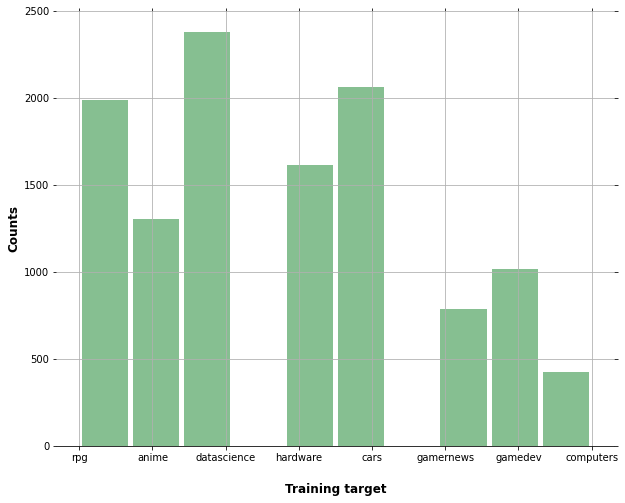

In [31]:
x = train.subreddit.hist(rwidth=0.9, color='#86bf91', figsize=(10,8))
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)
x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
x.set_xlabel("Training target", labelpad=20, weight='bold', size=12)
x.set_ylabel("Counts", weight='bold', size=12)


## Text processing

#### Clean text

In [9]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')


def text_prepare(text):
    """
    text: a string
        return: modified initial string
    """
    lower = text.lower()  # lowercase text
    space_replace = REPLACE_BY_SPACE_RE.sub(
        " ", lower)  #replace REPLACE_BY_SPACE_RE symbols by space in text
    nosymb = BAD_SYMBOLS_RE.sub(
        " ",
        space_replace)  # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub(r"\s*\b(?:{})\b".format("|".join(my_stop_words)), "",
                  nosymb)  # delete STOPWORDS

    return re.sub(r" {2,}", " ", text.strip())

from nltk.stem.porter import PorterStemmer
def stemm_text(my_text):
  my_tokens = my_text.split()
  porter = PorterStemmer()
  stemmed_tokens = []
  for token in my_tokens:
    stemmed_tokens.append(porter.stem(token))
  separator = ' '
  return separator.join(stemmed_tokens)

In [10]:
X_train = X_train.apply(text_prepare)
X_test = X_test.apply(text_prepare)
X_train = X_train.apply(stemm_text)
X_test = X_test.apply(stemm_text)

#### Failed attempts

In [ ]:
from nltk.stem.porter import PorterStemmer
def stemm_text(my_text):
  my_tokens = my_text.split()
  porter = PorterStemmer()
  stemmed_tokens = []
  for token in my_tokens:
    stemmed_tokens.append(porter.stem(token))
  separator = ' '
  return separator.join(stemmed_tokens)

# It didn't increase the accuracy!!
X_train = X_train.apply(stemm_text)
X_test = X_test.apply(stemm_text)

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemm_text(my_text):
  my_tokens = my_text.split()  
  stemmed_tokens = []
  for token in my_tokens:
    stemmed_tokens.append(lemmatizer.lemmatize(token))
  separator = ' '
  return separator.join(stemmed_tokens)
X_train = X_train.apply(stemm_text)
X_test = X_test.apply(stemm_text)
# it didn't increase accuracy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]
# it didn't increase accuracy

from nltk.stem import PorterStemmer

class StemTokenizer:
     def __init__(self):
       self.wnl =PorterStemmer()
     def __call__(self, doc):
       return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha()]

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos ="v") for t in word_tokenize(doc) if t.isalpha()]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Algorithms implementation

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

text_clf_logreg = Pipeline([
                ('vect', CountVectorizer(ngram_range=(1,1))),                
                #('norm',Normalizer(copy = 'False')),
                ('tfidf', TfidfTransformer()),                
                ('clf', LogisticRegression(n_jobs=-1, C=25)),
               ])

In [ ]:
text_clf_logreg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=25, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
   

In [ ]:
np.mean(cross_val_score(text_clf_logreg, X_train, y_train, verbose = 10))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.899, total=   5.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV] .................................... , score=0.907, total=   5.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


[CV] .................................... , score=0.891, total=   5.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.2s remaining:    0.0s


[CV] .................................... , score=0.893, total=   5.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.7s remaining:    0.0s


[CV] .................................... , score=0.899, total=   5.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.2s finished


0.897685165514635

Confussion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(text_clf_logreg, X_train, y_train, cv=5, verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.2min finished


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[1873,   12,   23,   10,   26,   11,   30,    3],
       [  30, 1229,   12,    5,   12,    7,    9,    0],
       [  18,    2, 2305,   18,   15,    0,   11,   13],
       [  15,    5,   42, 1408,   28,   61,   26,   32],
       [  15,   10,   19,   25, 1983,    1,    7,    4],
       [  79,   10,   15,   82,   24,  506,   67,    1],
       [  57,    6,   93,   11,   17,   17,  810,    5],
       [   5,    1,   18,   75,   20,    2,   10,  296]])

Creation of submission csv

In [ ]:
submission = test.copy()
prediction = text_clf_logreg.predict(X_test)
submission['subreddit'] = target_labels[prediction]

In [ ]:
submission = submission.drop(columns=['body'])
submission.to_csv('out.csv', index=False)

#### Auxiliary grid search

In [ ]:
parameters = {    
    'vect__ngram_range': [(1, 1),(1,2)],
    'tfidf__use_idf': [True],
    'clf__C':[0.1,0.25,0.5,1,25,50,100,250,500,1000,2500,5000,7500],
    'clf__penalty':["l2"]
}
gs_clf_logreg=GridSearchCV(text_clf_logreg, parameters, cv=5, n_jobs=-1)

In [ ]:
gs_clf_logreg = gs_clf_logreg.fit(X_train, y_train)

In [ ]:
import pickle
with open('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/clf_results_log_reg.txt','wb') as fp:
  pickle.dump(gs_clf_logreg,fp)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/clf_results_log_reg.txt', "rb") as fp:   # Unpickling
  gs_clf_logreg = pickle.load(fp)

In [ ]:
def plot_grid_search(ax, cv_results, grid_param, name_param,condition_function, label):
      # Get Test Scores Mean and std for each grid search    
    scores_mean = [ mean for idx,mean in enumerate(cv_results['mean_test_score'] )   if condition_function(idx)]
    scores_sd = [ sd for idx,sd in enumerate(cv_results['std_test_score'])   if condition_function(idx)]
    ax.plot(grid_param, scores_mean, '-o', label= label)

def plot_grid_search_times(ax, cv_results, grid_param, name_param,condition_function,label):
      # Get Test Scores Mean and std for each grid search    
    time_mean = [ mean for idx,mean in enumerate(cv_results['mean_fit_time'] )   if condition_function(idx)]
    time_sd = [ sd for idx,sd in enumerate(cv_results['std_score_time'])   if condition_function(idx)]
    ax.plot(grid_param, time_mean, '--*', label= label)

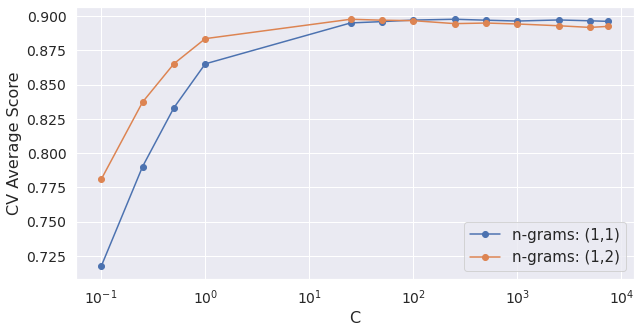

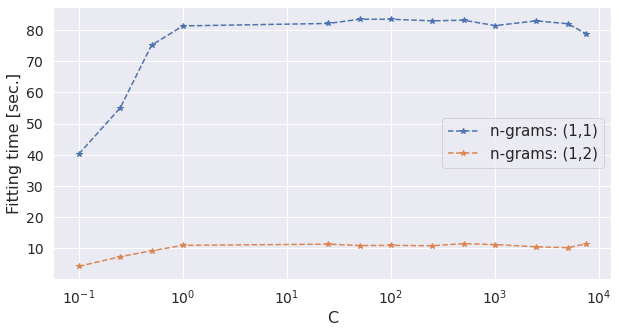

In [ ]:
    plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=14)    # fontsize of the tick labels

    params_C = parameters['clf__C']
    params = gs_clf_logreg.cv_results_['params']
    cond1 = lambda idx: (params[idx]['clf__penalty']=='l2') and (params[idx]['vect__ngram_range']==(1,2))
    cond2 = lambda idx: (params[idx]['clf__penalty']=='l2') and (params[idx]['vect__ngram_range']==(1,1))

    # Plot Grid search scores
    f, ax = plt.subplots(figsize=(10,5))
    plot_grid_search(ax,gs_clf_logreg.cv_results_,params_C,'C',cond1,'n-grams: (1,1)')
    plot_grid_search(ax,gs_clf_logreg.cv_results_,params_C,'C',cond2,'n-grams: (1,2)')
    
    ax.set_xlabel('C', fontsize=16)
    ax.set_xscale('log')
    
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')    
    plt.savefig('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/score_vs_C_log_reg.png',dpi=300)

    # Plot Times
    f, ax = plt.subplots(figsize=(10,5))
    plot_grid_search_times(ax,gs_clf_logreg.cv_results_,params_C,'C',cond1,'n-grams: (1,1)')
    plot_grid_search_times(ax,gs_clf_logreg.cv_results_,params_C,'C',cond2,'n-grams: (1,2)')
    
    ax.set_xlabel('C', fontsize=16)
    ax.set_xscale('log')
    
    ax.set_ylabel('Fitting time [sec.]', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')   
    plt.savefig('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/time_vs_C_log_reg.png',dpi=300) 

#### Grid search for logistic regression.. no need to run it again (takes a long time), I already put the best parameters on the above cell.

In [ ]:
parameters = {    
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__C':np.logspace(-3,3,7),
    'clf__penalty':["l1","l2"]
}
gs_clf_logreg=GridSearchCV(text_clf_logreg, parameters, cv=5, n_jobs=-1)

In [ ]:
gs_clf_logreg = gs_clf_logreg.fit(X_train, y_train)

In [ ]:
gs_clf_logreg.best_score_

0.8933688297728809

In [ ]:
gs_clf_logreg.best_params_

{'clf__C': 100.0,
 'clf__penalty': 'l2',
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 1)}

### SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf_SVM = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',      
      max_iter=5, tol=None)),
])

In [ ]:
text_clf_SVM.fit(X_train,y_train)
np.mean(cross_val_score(text_clf_SVM, X_train, y_train, cv=5))

0.8532202844038543

#### Parameter tuning using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': [True],
    'clf__alpha':  np.sort(np.concatenate([np.logspace(-6,2,8), np.linspace(2.1e-5,2.2e-5,9),
                                           
                         np.array([2.1e-5,2.2e-5,2.3e-5,2.4e-5,2.5e-5])])),
}

In [ ]:
gs_clf_SVM = GridSearchCV(text_clf_SVM, parameters, cv=5, n_jobs=-1)

In [ ]:
gs_clf_SVM = gs_clf_SVM.fit(X_train, y_train)

In [ ]:
gs_clf_SVM.best_score_

0.9017432911207468

In [ ]:
gs_clf_SVM.best_params_

{'clf__alpha': 2.15e-05, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/clf_results_SDG.txt','wb') as fp:
  pickle.dump(gs_clf_SVM,fp)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/clf_results_SDG.txt', "rb") as fp:   # Unpickling
  gs_clf_SVM = pickle.load(fp)

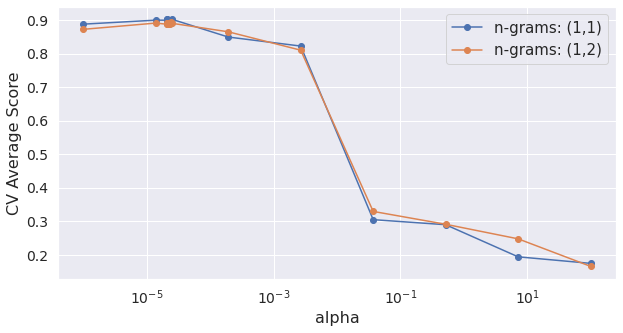

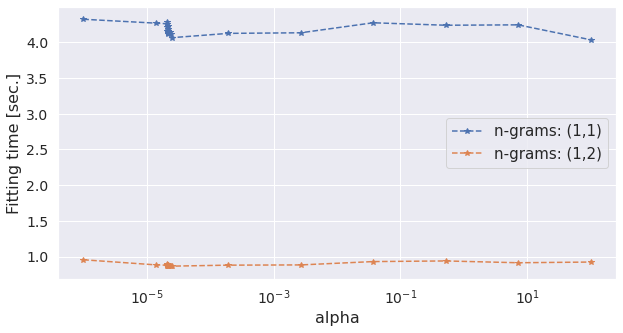

In [ ]:
    params_alpha = parameters['clf__alpha']
    params = gs_clf_SVM.cv_results_['params']
    cond1 = lambda idx:  params[idx]['vect__ngram_range']==(1,2)
    cond2 = lambda idx: params[idx]['vect__ngram_range']==(1,1)

    # Plot Grid search scores
    f, ax = plt.subplots(figsize=(10,5))
    plot_grid_search(ax,gs_clf_SVM.cv_results_, params_alpha,'alpha',cond1,'n-grams: (1,1)')
    plot_grid_search(ax,gs_clf_SVM.cv_results_, params_alpha,'alpha',cond2,'n-grams: (1,2)')
    
    ax.set_xlabel('alpha', fontsize=16)
    ax.set_xscale('log')
    
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')    
    plt.savefig('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/score_vs_C_SGD.png',dpi=300)
    # Plot Times
    f, ax = plt.subplots(figsize=(10,5))
    plot_grid_search_times(ax,gs_clf_SVM.cv_results_,params_alpha,'C',cond1,'n-grams: (1,1)')
    plot_grid_search_times(ax,gs_clf_SVM.cv_results_,params_alpha,'C',cond2,'n-grams: (1,2)')
    
    ax.set_xlabel('alpha', fontsize=16)
    ax.set_xscale('log')
    
    ax.set_ylabel('Fitting time [sec.]', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')    
    plt.savefig('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/time_vs_C_SGD.png',dpi=300)

In [ ]:
# Confusion matrix and heat map

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(gs_clf_SVM, X_train, y_train, cv=5, verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 12.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 17.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 21.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 21.4min finished


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)


array([[1880,   18,   20,    6,   21,   11,   31,    1],
       [  25, 1243,    9,    4,    9,    5,    6,    3],
       [  24,    3, 2292,   16,   14,    2,   17,   14],
       [  12,    7,   43, 1396,   28,   61,   28,   42],
       [  14,   14,   22,   20, 1975,    5,    8,    6],
       [  76,   14,   14,   68,   17,  530,   62,    3],
       [  52,   14,   85,   13,   10,   22,  809,   11],
       [   0,    4,   15,   70,   16,    2,   10,  310]])

In [ ]:
target_labels

Index(['rpg', 'anime', 'datascience', 'hardware', 'cars', 'gamernews',
       'gamedev', 'computers'],
      dtype='object')

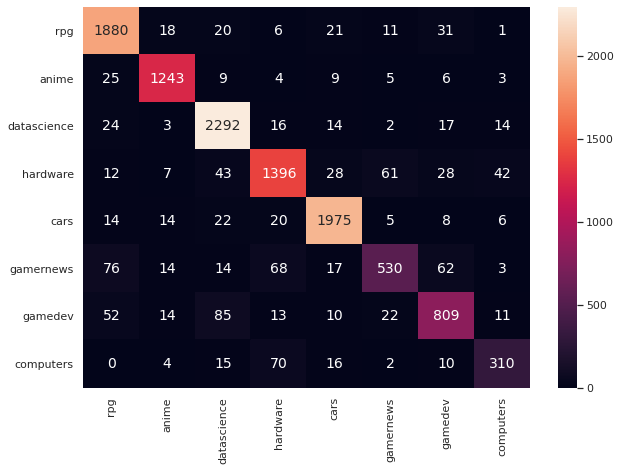

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_train, y_train_pred), index = target_labels,columns = target_labels)
sns.set(font_scale=1) # for label size
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 14}) # font size
plt.savefig('/content/drive/My Drive/Colab Notebooks/Mini Project 2 ECSE 551 Team 2/heat_map_SGD.png',dpi=300)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_clf_rnd_frest = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)),
               ])

In [ ]:
text_clf_rnd_frest.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=3, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                   

In [ ]:
np.mean(cross_val_score(text_clf_rnd_frest, X_train, y_train, cv=5))

0.3944949211467691

### Support Vector Machine

In [ ]:
# linear SVC
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([('vect', CountVectorizer(max_features=40000)),
                ('tfidf', TfidfTransformer()),
   #              ("scaler", StandardScaler()),
                ("clf", LinearSVC(loss="hinge")),
])

In [ ]:
parameters = {    
    'vect__ngram_range': [(1,1),(1,2)],
    #'vect__tokenizer':[New_LemmaTokenizer(),LemmaTokenizer(), StemTokenizer(), None],
    'tfidf__use_idf': [True],
    'clf__C':[0.1,0.25,0.5,1,25,50,100,250,500,1000,2500],
    #'clf__penalty':["l2"]
}
gs_clf_logreg=GridSearchCV(svm_clf, parameters, cv=5, n_jobs=-1, verbose = 10)
gs_clf_logreg = gs_clf_logreg.fit(X_train, y_train)
gs_clf_logreg.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.3s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


{'clf__C': 1, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [ ]:
gs_clf_logreg.best_score_

0.9007070589612111